**Objetivo de este problema es determinar los factores que pueden llevar a los concesionarios a cumplir con los objetivos de satisfacción mínima.**

Datos *deIiveryDatasetChaIlenge.json* incluye datos de 29,389 rutas de camiones, realizadas por 29,389 empleados con las siguientes variables : 

**Primeras 10 columnas**

- **anonId:** Identificador único de la ruta
- **birthdate:** Fecha de nacimiento del empleado
- **routeDate:** Día en que se realizó la ruta entre el 20/05/11 y el 20/05/22
- **region:** Zona del mundo donde se ejecutó la ruta:
    - NA: North America
    - AMESA: Africa, Middle East and South Asia
    - APAC: Asia Pacific, Australia/New Zealand, and China 
    - LATAM: Latin America
    - Europe
- **gender:** Género autodeterminado del empleado {F-Female, M-Male, X-Non binary}
- **areaWealthLevel:** Desarrollo de la zona económica, en comparación con el conjunto del país (Low, Mid or High)
- **areaPopulation:** Población de la zona cubierta, en miles
- **badWeather:** Malas condiciones meteorológicas en la zona, como precipitaciones o viento fuerte
- **weatheRestrictions:** Afectaciones en la zona debido al clima
- **routeTotalDistance:** Distancia de la ruta recorrida en kms

**Segundo set de columnas**

- **numberOfShops:** Total Tiendas que cubrimos en la zona
- **marketShare:** Porcentaje de cuota de mercado que la empresa tiene en la zona en sus categorías.
- **avgAreaBenefits:** Beneficio económico semanal en la zona (en miles de $)
- **timeFromAvg:** Tiempo empleado en la ruta, comparado con la media (negativo significaría que se tardó menos que la media
- **advertising:** Inversión en material de punto de venta en las tiendas (de 0, que significa que no se invierte, a 3, que se invierte mucho)
- **emoloyeeLYScore:** Calificando la puntuación del año pasado (de 1 a 5, siendo 5 la más alta). Los nuevos empleados tienen 3 por defecto.
- **employeeTenure:** Tiempo que el empleado lleva en la empresa
  - 0: se han incorporado en los últimos 12 meses 
  - 1: de 1 a 3 años
  - 2: de 3 a 10 años
  - 3: mas de 1O años
- **emploIoyeePrevComps:** Número de empresas en las que el empleado trabajó anteriormente desarrollando la misma función (5 significa 3 o más).
- **success:** El distribuidor ha distribuido al menos el valor esperado (1) o menos (0)

In [94]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

pio.templates.default = "ggplot2"
warnings.filterwarnings('ignore')
pio.renderers.default='jupyterlab'
pd.set_option('display.float_format', lambda x: '%.2g' % x)

def edad(birthdate):
    return int(((datetime.now() - birthdate).days)/365.2425)

with open('2_Inputs/deliveryDatasetChallenge.json') as json_file:
    data = json.load(json_file)
    
    print("Type:", type(data))


data = pd.DataFrame(data)
data_columns = data.columns.str.split(';',expand=True)

data = data.iloc[:,0].str.split(';',expand=True)

data.columns = ['anonID','birthdate','routeDate','region','gender','areaWealthLevel','areaPopulation',
                'badWeather','weatherRestrictions','routeTotalDistance','numberOfShops','marketShare',
                'avgAreaBenefits','timeFromAvg','advertising','employeeLYScore','employeeTenure','employeePrevComps','success']

data = data.reset_index().drop(["index"], axis =1)

del json_file
del data_columns

data.head()

Type: <class 'dict'>


,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,23/10/1969,19/05/2020,NA,M,Mid,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NA
1,KANY6459,14/04/1976,19/05/2020,LATAM,M,Mid,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NA
2,ULUZ5859,03/04/1985,NA,NA,M,High,25.08,Yes,No,25.9,25,76,14.01,NA,2,3,1,1,NA
3,LDCQ7279,24/03/1968,11/05/2020,NA,M,Mid,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NA
4,KIUB5860,22/04/1978,19/05/2020,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NA


In [95]:
#####################
#Formato de columnas#
#####################
#Variables númericas : 'areaPopulation','routeTotalDistance','numberOfShops','marketShare', 'avgAreaBenefits', 'timeFromAvg',
#                      'advertising', 'employeeLYScore','employeeTenure', 'employeePrevComps'
data["areaPopulation"] = data["areaPopulation"].astype(float)
data['routeTotalDistance'] = data['routeTotalDistance'].astype(float)
data['numberOfShops'] = data['numberOfShops'].astype(int)
data['marketShare'] = data['marketShare'].astype(float)

data.loc[data['avgAreaBenefits'] == 'NA','avgAreaBenefits'] = 0
data['avgAreaBenefits'] = data['avgAreaBenefits'].astype(float)

data.loc[data['timeFromAvg'] == 'NA','timeFromAvg'] = 0
data['timeFromAvg'] = data['timeFromAvg'].astype(float)

data['advertising'] = data['advertising'].astype(int)
data['employeeLYScore'] = data['employeeLYScore'].astype(int)
data['employeeTenure'] = data['employeeTenure'].astype(int)
data['employeePrevComps'] = data['employeePrevComps'].astype(int)

#Variables categorícas : 'anonID', 'region', 'gender', 'areaWealthLevel','badWeather', 'weatherRestrictions','success'
data.loc[data['success'] == 'NA','success'] = -1
data['success'] = data['success'].astype(int)
data["region-gender-areaWealthLevel-badWeather-weatherRestrictions"] = data["region"] +"-"+ data["gender"] +"-"+ data["areaWealthLevel"] +"-"+ data["badWeather"] +"-"+ data["badWeather"] 

#Variables tipo fecha
data["birthdate"] = pd.to_datetime(data["birthdate"])
data["edad"] = data["birthdate"].apply(edad)

data["routeDate"] = np.where(data["routeDate"] == 'NA', '', data["routeDate"])
data["routeDate"] = pd.to_datetime(data["routeDate"])
data["month"] = data["routeDate"].dt.month.astype(str)
data["day"] = data["routeDate"].dt.day.astype(str)
data["year"] = data["routeDate"].dt.year.astype(str)
data["month"] = data["month"].apply(lambda x : x.replace('.0',''))
data["day"] = data["day"].apply(lambda x : x.replace('.0',''))
data["year"] = data["year"].apply(lambda x : x.replace('.0',''))

#Reacomodo
data = data.loc[:,["anonID","birthdate","edad","routeDate","month","day","year","region","gender","areaWealthLevel","badWeather","weatherRestrictions",
                   "region-gender-areaWealthLevel-badWeather-weatherRestrictions","areaPopulation","routeTotalDistance","numberOfShops","marketShare",
                   "avgAreaBenefits","timeFromAvg","advertising","employeeLYScore","employeeTenure","employeePrevComps","success"]]

data.head()

,anonID,birthdate,edad,routeDate,month,day,year,region,gender,areaWealthLevel,...,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,1969-10-23,52,2020-05-19,5,19,2020,NA,M,Mid,...,28,26,49,19,0.35,3,4,1,1,-1
1,KANY6459,1976-04-14,46,2020-05-19,5,19,2020,LATAM,M,Mid,...,21,28,96,14,0.47,3,4,3,2,-1
2,ULUZ5859,1985-03-04,37,NaT,nan,nan,nan,NA,M,High,...,26,25,76,14,0,2,3,1,1,-1
3,LDCQ7279,1968-03-24,54,2020-11-05,11,5,2020,NA,M,Mid,...,24,26,65,19,-0.37,2,4,3,2,-1
4,KIUB5860,1978-04-22,44,2020-05-19,5,19,2020,AMESA,M,Low,...,23,22,72,12,0.44,2,3,3,2,-1


In [96]:
######################
#Exploración de datos#
######################

data.groupby(["success"]).count()
data["success"].value_counts(normalize = True)

data.isnull().sum()

data_filter = data[(data["success"] >= 0) & ~(data["routeDate"].isnull())]
data_filter["success"].value_counts()

data_filter.groupby(['month'], as_index = True).agg({'success':'count'}).reset_index()
data_filter['month'].value_counts(normalize = True)


5      0.8
11     0.1
12   0.095
Name: month, dtype: float64

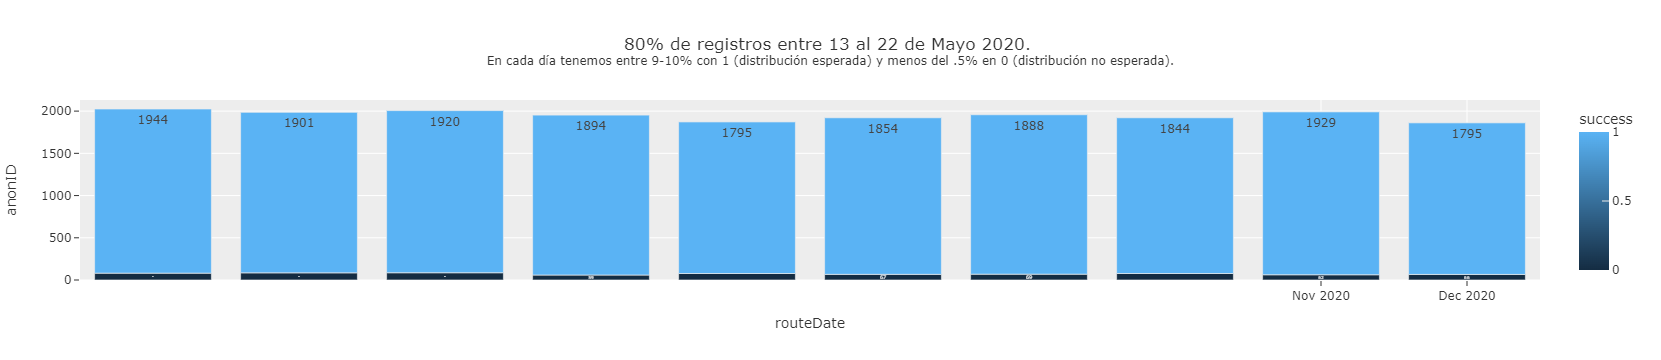

In [97]:
tmp = data_filter.groupby(['routeDate','day','month','success'], as_index = True).count().reset_index()

#lÓGICA PARA EXCLUIR FECHAS VACÍAS DEL GRÁFICO.
dt_all = pd.date_range(start=tmp['routeDate'].iloc[0],end=tmp['routeDate'].iloc[-1])
dt_obs = [d.strftime("%Y-%m-%d") for d in tmp['routeDate']]
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

fig = px.bar(tmp, x="routeDate", y="anonID",
                  color="success",
                  text_auto=True,
                  text="anonID",
                  title = "80% de registros entre 13 al 22 de Mayo 2020. <br><sup>En cada día tenemos entre 9-10% con 1 (distribución esperada) y menos del .5% en 0 (distribución no esperada).</sup>")

fig.update_xaxes(
    rangebreaks=[dict(values=dt_breaks)]
)

fig.show()

In [105]:
#Conteo de variables categoricas, respecto a la distribución (0,1)
#region, genero, areaWealthLvele tienen un 96-97% con distrubución esperada y entre 3-4% distribución no esperada. 
def grupos(grupo = ['region','success'], num_grupos = 2):
    if num_grupos == 1:
        return data_filter.groupby(grupo).count().iloc[:,:1]
    else :
        return data_filter.groupby(grupo).agg({'success': 'count'}).groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)) 

print(grupos(['success'],num_grupos=1))
print(grupos(['routeDate','success']))
print(grupos(['region','success']))
print(grupos(['gender','success']))
print(grupos(['areaWealthLevel','success']))

         anonID
success        
0           729
1         18764
                    success
routeDate  success         
2020-05-13 0              4
           1             96
2020-05-14 0            4.3
           1             96
2020-05-15 0            4.3
           1             96
2020-05-18 0              3
           1             97
2020-05-19 0            4.1
           1             96
2020-05-20 0            3.5
           1             96
2020-05-21 0            3.5
           1             96
2020-05-22 0              4
           1             96
2020-11-05 0            3.1
           1             97
2020-12-05 0            3.5
           1             96
                success
region success         
AMESA  0            3.9
       1             96
APAC   0            3.8
       1             96
Europe 0            3.6
       1             96
LATAM  0            4.2
       1             96
NA     0            3.5
       1             96
                success
gender s

In [104]:
#badWeather: Malas condiciones meteorológicas en la zona, como precipitaciones o viento fuerte
#weatheRestrictions: Afectaciones en la zona debido al clima

#Tenemos un ligero aumento cuando el clima afecta la ruta.

print(grupos(['badWeather','success']))
print(grupos(['weatherRestrictions','success']))
#tmp = grupos(['region-gender-areaWealthLevel-badWeather-weatherRestrictions','success'])

                    success
badWeather success         
No         0            3.6
           1             96
Yes        0            5.6
           1             94
                             success
weatherRestrictions success         
No                  0            3.7
                    1             96
Yes                 0            9.4
                    1             91
